<a href="https://colab.research.google.com/github/Pedro1-21GW/sigmoidal/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_(Tokyo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<img alt="MyLogo" width="100%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/Banner%20verde.png">

# Análise dos Dados do Airbnb - Tokyo

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Tokyo" width="100%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/tokyo-1.jpg"></center>


## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame

DATAPATH = "https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/listings.csv"
df = pd.read_csv(DATAPATH)

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número gerado para identificação do imóvel
* `name` - nome da propriedade anunciada.
* `host_id` - número gerado para identificação do proprietário/anfitrião da propriedade.
* `host_name` - nome do anfitrião.
* `neighbourhood_group` - esta coluna possui apenas valores ausentes.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude`- coordenada da longitude da propriedade.
* `room_type` - tipo do quarto oferecido.
* `price` - preço para o aluguel do imóvel.
* `minimum_nights` - quantidade mínima de noites para reserva.
* `number_of_reviews` - número de avalições que a propriedade possui.
* `last_review` - última avaliação.
* `reviews_per_month` - número de avaliações mensais do imóvel.
* `calculated_host_listings_count` - número de imóveis que o anfritrião possui na localidade da propriedade verificada.
* `availability_365` - disponibilidade anual do imóvel.
* `number_of_reviews_ltm` - número de avaliações da propriedade nos últimos 12 meses.
* `license` - Código de registro/permissão/licença para o aluguel.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2019-11-14,1.50,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7816,3,228,2020-01-18,2.33,1,216,0,M130000243
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.78,2,270,0,M130007760
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,14036,1,252,2020-02-12,2.73,3,365,1,M130002814
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,0.98,2,88,0,M130007760


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

 Em seguida, vamos identificar qual o tamanho do nosso *dataset*, observando o número de variáveis, número de  entradas e até os tipos de variáveis.
Além disso, vale mencionar que o conjunto de dados sendo utilizado é uma versão "resumida" do Airbnb. Na mesma página em que baixamos o arquivo `listings.csv`, estão disponíveis conjuntos mais completos, como o `listings.csv.gz`. 
Apesar disso, o *dataset* utilizado supre completamente a análise exploratória realizada aqui. 

In [5]:
# identificar o volume de dados do DataFrame

print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

# verificar as 5 primeiras entradas do dataset
print(df.dtypes)

Entradas:	 10670
Variáveis:	 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

> É **importantíssimo** tratar dos valores ausentes em nosso *dataset*, estando eles diretamente relacionados com a qualidade de nosso conjunto de dados. Vamos tentar entender logo de cara qual é a **relevância percentual desses valores ausentes** se comparados ao total de entradas.

Com isso, foi possível notar que:

*   A coluna `neighbourhood_group` possui 100% de entradas ausentes.
*   As variáveis `reviews_per_month` e `last_review` possuem praticamento 20% de entradas ausentes.



In [6]:
# ordenar em ordem decrescente as variáveis pelos percentuais de seus valores ausentes
(df.isnull().sum().sort_values(ascending = False))/(df.shape[0])

neighbourhood_group               1.000000
reviews_per_month                 0.195689
last_review                       0.195689
license                           0.003187
host_name                         0.001968
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
> Uma ferramenta gráfica que ilustra bem a distribuição de um conjunto de dados é o histograma. Vamos plotar essas distribuições para cada uma de nossa variáveis numéricas.
Caso queira saber mais sobre histogramas, [clique aqui.](https://pt.khanacademy.org/math/statistics-probability/displaying-describing-data/quantitative-data-graphs/a/histograms-review)

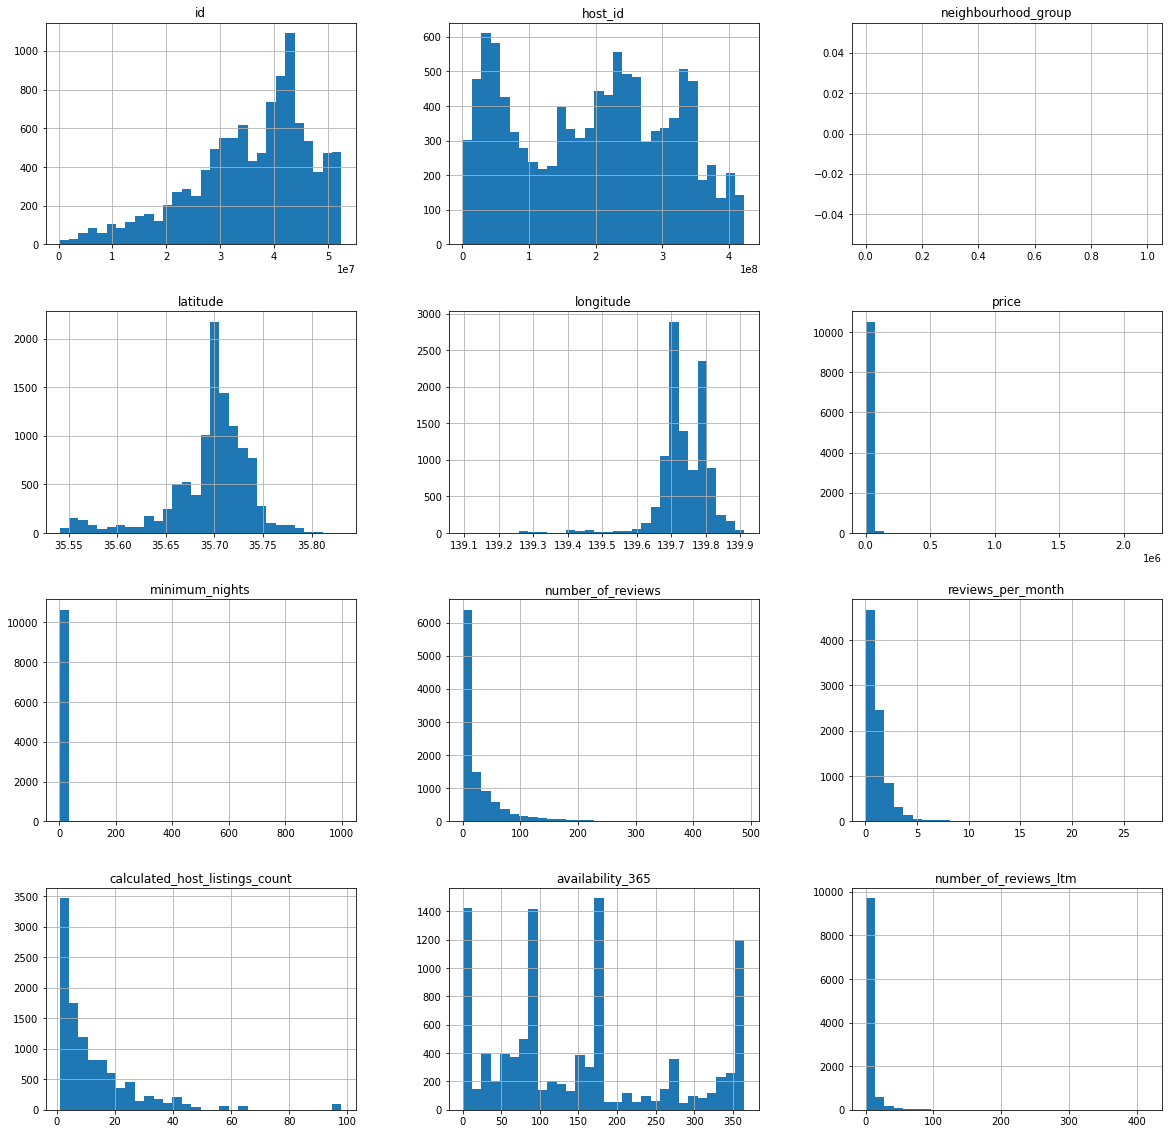

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 30, figsize=(20,20));

###**Q3.1. Existem *ouliers* presentes?**

<center><img alt="detetive" width="60%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/detetive2.png"></center>






 A partir dos histogramas acima, podemos notar ocorrências de valores muito discrepantes em nossa distribuição, podendo assim indicar que estamos lidando com *outliers*. 
Existem formas rápidas para detectar esses *ouliers*. Como por exemplo\:
* Resumo estatístico pelo método `describe()`.
* Plotar `boxplots` para as variáveis investigadas.


#### Utilizando o método `describe()` 

In [8]:
# vamos mostrar o resumo estatístico de nossas variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.067000e+04,10670.000000,10670.000000,8582.000000,10670.000000,10670.000000
mean,1.281379e+04,3.594283,27.172727,1.127977,12.671415,152.890347
std,4.241447e+04,24.674502,44.159342,1.237049,14.362714,117.847991
min,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,4.257000e+03,1.000000,1.000000,0.360000,3.000000,62.000000
50%,7.000000e+03,1.000000,9.000000,0.830000,8.000000,129.000000
75%,1.237550e+04,2.000000,34.000000,1.480000,17.000000,237.000000
max,2.185000e+06,999.000000,489.000000,27.310000,98.000000,365.000000


> A partir do resumo estatístico acima, podemos confirmar a nossa suspeita sobre a presença de *outliers*, como por exemplo
* A variável `minimum_nights` possui valor superior aos 365 dias do ano.
* Em `reviews_per_month` podemos ver que 75% dos valores estão abaixo de 1.48, porém seu valor máximo é de 27.31

#### Utilizando o `box_plot` para `minimum_nights`

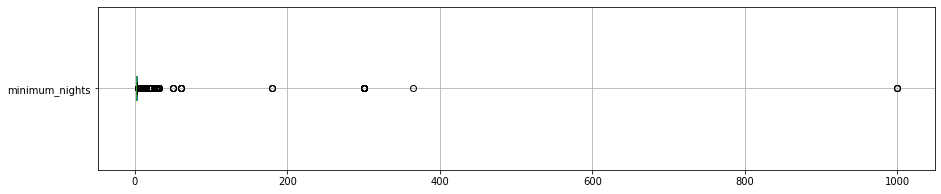

In [9]:
df.boxplot(column='minimum_nights',vert=False, figsize=(15,3));

In [10]:
# vamos verificar quantos valores estão acima de 40 dias (limiar arbitrário) para minimum_nights
limiar = 40
num_out = df[df.minimum_nights > limiar].shape[0]
print(f"Temos {num_out} entradas com valores acima de {limiar}")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

Temos 51 entradas com valores acima de 40
Percentualmente, valendo 0.47797563261480785%


#### Utilizando o `box_plot` para `reviews_per_month`


Temos 12 entradas com valores acima de 11 (limiar arbitrário).
Percentualmente, valendo 0.11246485473289597%


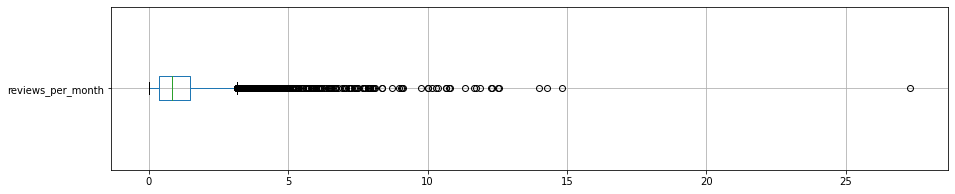

In [11]:
df.boxplot(column='reviews_per_month',vert=False, figsize=(15,3));
limiar_2 = 11
num_out = df[df.reviews_per_month > limiar_2].shape[0]
print(f"Temos {num_out} entradas com valores acima de {limiar_2} (limiar arbitrário).")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

#### Histogramas sem *outliers* 
> Identificamos os nossos *outliers* nas variáveis `minimum_nights` e `reviews_per_month`, o que fazer?
Podemos limpar nosso *DataFrame*, retirando esses valores, e plotar novamente os histogramas.

> Para realizar tal limpeza usaremos o método `drop()` (apesar de existirem inúmeras [outras opções](https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe) com o pacote Pandas).
Além disso, podermos também retirar a coluna `neighbourhood_group`, que está recheada de valores ausentes.

In [12]:
# remover outliers do nosso DataFrame e alocar dados filtrados em outro DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > limiar].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.reviews_per_month > limiar_2].index, axis = 0, inplace = True)

# remover a coluna "neighbourhood_group", pois está vazio
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

# vamos conferir a nova dimensionalidade do nosso DataFrame
print(f" O nosso DataFrame filtrado possui dimensões: {df_clean.shape}")

 O nosso DataFrame filtrado possui dimensões: (10607, 17)


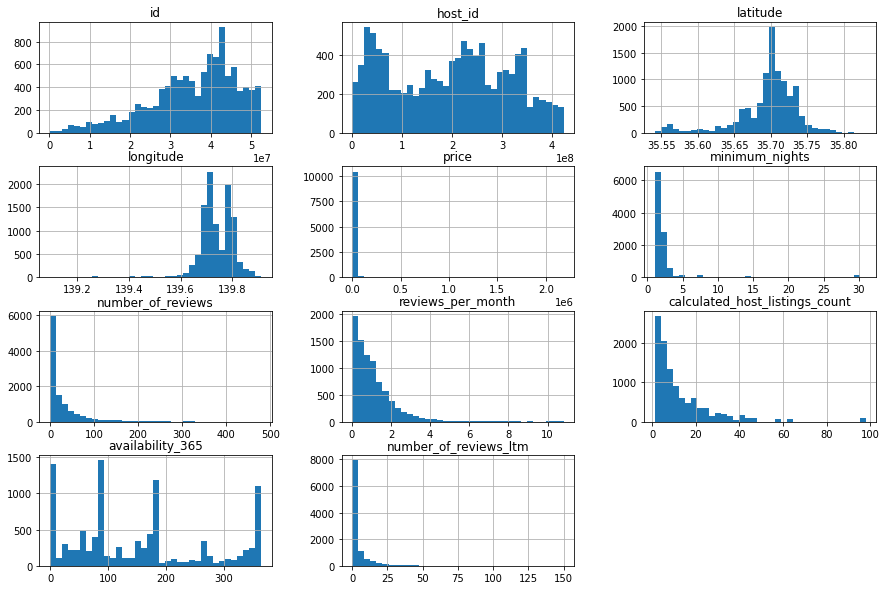

In [13]:
# vamos plotar histogrmas sem outliers
df_clean.hist(bins=35, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Agora vamos falar de algo bem relevante: **preços**. Mais precisamente, vamos ver qual é a media do preço de aluguel de imóveis em Tokyo.


*   A média da coluna `price` aponta um valor médio de **U$ 12686** por aluguel! 

<center><img alt="Criança_Surpresa" width="40%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/crianca_surpresa.jpg"></center>




In [14]:
# ver a média da coluna price
df_clean.price.mean()

12686.6812482323

###**Q5. Qual a correlação existente entre as variáveis**
> **Correlação** pode ser entendida como uma métrica para a relação entre coisas. Nessa análise, vamos verificar as relações entre duas variáveis.

> Para quantificar essa correlação, podemos usar o coeficiente de correlação, que é um valor limitado entre 0 (indicando nenhuma correlação) e 1 (indicando máxima correlação).

> Para melhorar a visualização sobre esse coeficiente, usarei das seguintes ferramentas\: 

*   Criar uma matriz de correlação
*   Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.


In [15]:
# criar uma matriz de correlação
correlation = df_clean[['price','minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_365','number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
correlation

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
price,1.000000,-0.011536,-0.017014,-0.013378,-0.019215,-0.025502
minimum_nights,-0.011536,1.000000,-0.026333,-0.066424,-0.006052,-0.069715
number_of_reviews,-0.017014,-0.026333,1.000000,0.679519,0.019582,0.389323
reviews_per_month,-0.013378,-0.066424,0.679519,1.000000,-0.007791,0.694713
availability_365,-0.019215,-0.006052,0.019582,-0.007791,1.000000,0.000838
number_of_reviews_ltm,-0.025502,-0.069715,0.389323,0.694713,0.000838,1.000000


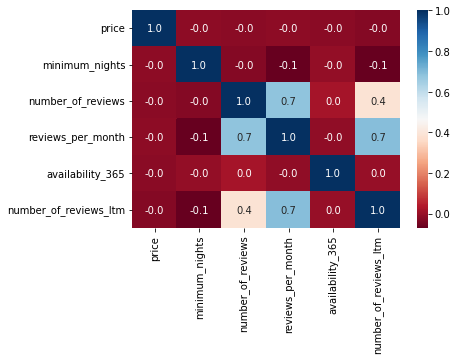

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlation, cmap='RdBu',fmt='.1f', annot=True);

 Através da matriz acima, podemos notar as seguintes correlações entre variáveis do nosso *dataset* (lembre-se que 1 e 0 são nossos valores máximos e mínimos): 

*   `number_of_reviews_ltm` e `number_of_reviews`, com 0.4
*   `number_of_reviews_ltm` e `reviews_per_month`, com 0.7

 As variáveis apresentadas contabilizam o número de revisões/avaliações sobre imóveis em diferentes espaços de tempo, o que torna a correlação entre as variáveis plausível, na medida em que são similares em certa instância. 


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type()` em nosso *dataset* representa o tipo de imóvel alugado. Vamos investigar quais os valores e as relevâncias percentuais de cada um desses tipos!

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    7253
Private room       2616
Shared room         404
Hotel room          397
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/df.shape[0]).head(5)

Entire home/apt    0.679756
Private room       0.245173
Shared room        0.037863
Hotel room         0.037207
Name: room_type, dtype: float64

 Em primeiro lugar, com esmagadores **67.97%**, os **apartamentos/casas são o tipo de imóvel mais alugado em Tokyo**. Em segundo lugar, temos os quartos privados, com **27.52%**, e por fim em terceiro lugar temos os quartos compartilhados, que superaram por pouco os quartos de hotel, com **3.78%** e **3.72%**, respectivamente. 

<center><img alt="Podio" width="50%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/podio_novo.png"></center>




#### **Q6.1 Qual a média de preço por tipo de imóvel alugado?**

Uma forma de agrupar entradas do mesma coluna é utilizando o método `groupby()`. Com isso, podemos  aqui comparar os **preços médios dos imóveis por tipo de imóvel**.

In [45]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending = False).head(4)

room_type
Entire home/apt    13123.652943
Private room       12770.460445
Hotel room         11448.612091
Shared room         4834.918478
Name: price, dtype: float64

Como esperado, o valor de aluguel da moradia compartilhada é consideravelmente menor do que os outros tipo de imóvel (casa, apartamento, quarto privado), atingindo uma média de U$ 4834.92.

### **Q7. Qual a localidade mais cara do dataset?**



Novamente, utilizaremos aqui o método `groupby()`, porém dessa vez iremos comparar os **preços médios dos imóveis por bairro.**

In [19]:
# ver preços por bairros, na média
agrupados_por_preco = df_clean.groupby(['neighbourhood']).price

In [20]:
agrupados_por_preco.mean().sort_values(ascending=False).head(10)

neighbourhood
Edogawa Ku      35611.542484
Shinagawa Ku    23907.257576
Chiyoda Ku      22169.398936
Nakano Ku       20915.832143
Komae Shi       17139.250000
Minato Ku       16963.105140
Kodaira Shi     16716.600000
Akiruno Shi     14995.692308
Arakawa Ku      14549.738938
Mitaka Shi      13926.545455
Name: price, dtype: float64

> De acordo com nosso *dataset*, **o bairro mais caro de Tokyo é a Edogawa Ku**, com preço médio de aluguel de **U$ 35611.54**, valor que corresponde à aproximadamente 280% do valor médio de aluguel calculado previamente.

> Além disso, é **importante nos certificar de que nossa análise de preço médio não está enviesada por imóveis caros com pouca representatividade numérica** , por isso vamos verificar o número de imóveis localizados nos bairros mais caros de Tokyo, segundo o *dataset* utilizado.



In [21]:
print(df_clean[df_clean.neighbourhood == 'Edogawa Ku'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Shinagawa Ku'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Chiyoda Ku'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Shibuya'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Aoyama'].shape[0])



153
198
188
0
0


> Podemos ver, pelas primeiras três linhas da célula acima, que o número de imóveis nas localidades mais caras são expressivos em relação ao nosso *dataset*, o que indica coerência em nossa análise. 

<center><img alt="like" width="30%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/like.png"></center>

#### Importante questionar...
> Contudo, é possível que após algumas pesquisas sobre os "bairros mais caros de Tokyo"  você possua a seguinte dúvida: "Quando pesquiso em sites de busca sobre localidades caras em Tokyo, os nomes contemplados em sua análise não aparecem. O que pode estar acontecendo? Sua análise está de fato correta?".




<center><img alt="desconfiado" width="50%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/desconfiado1.png"></center>


> Vale mencionar que estamos aqui limitados pelo *dataset* disponibilizado pelo portal [Inside AirBnb](http://insideairbnb.com/get-the-data.html), dessa forma é razoável afirmar que **alguns bairros luxosos de Tokyo não foram comtemplados aqui**, como por exemplo Shibuya e Aoyama, que não possuem imóveis disponíveis para aluguel em banco de dados, como verificado nas duas últimas linhas da célula de código acima.

Agora vamos em busca de uma análise mais visual, plotando um *heatmap* dos preços dos imóveis em função de suas coordenadas de **latitude** e **longitude**.

<center><img alt="latitude e longitude" width="50%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/latitude_longitude.png"></center>

OBS: Se você acha que essa análise não faz sentido por acreditar que a terra é plana, por favor [clique aqui](https://www.youtube.com/watch?v=T4WjyTV98lg).

#### Mapa de calor dos preços dos imóveis em função de latitude e longitude (Versão 1.0)

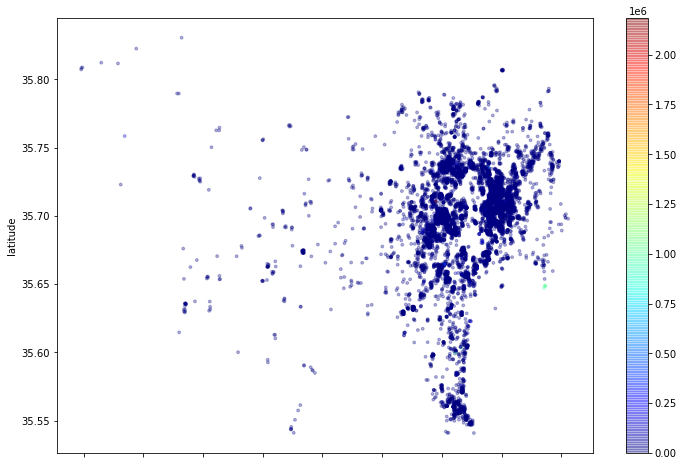

In [22]:
# plotar os imóveis pela latitude e longitude
df_clean.plot.scatter(x = 'longitude', y = 'latitude', alpha = 0.3, s=8,
                      c = df_clean.price, colormap ='jet',figsize=(12,8));

> De cara podemos afirmar que esse gráfico não nos revela muito, visto que o preço altíssimo, em relação à média, de alguns poucos imóveis elevou consideravelmente os limiares de nossa barra de cores, o que inviabilizou uma  diferenciação clara entre os preços no mapa acima.

> Dito isso, vamos investigar mais a variável `price`, assim com o `boxplot` abaixo poderemos concluir a percentagem de entradas com preço abaixo de um limiar superior arbitrário, dando assim uma melhor ideia sobre qual seria um os limites em nossa barra de cores. 


Temos 10059 entradas com valor abaixo de 30000.0 (limiar arbitrário).
Percentualmente, valendo 94.27366447985005%


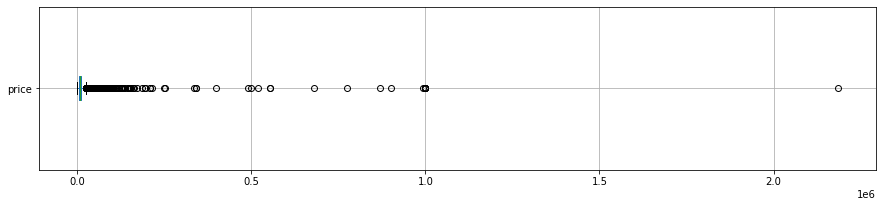

In [33]:
df.boxplot(column = 'price', vert = False, figsize=(15,3));
limiar_3 = 3e4
num_imoveis = df[df.price < limiar_3].shape[0]
print(f"Temos {num_imoveis} entradas com valor abaixo de {limiar_3} (limiar arbitrário).")
print(f"Percentualmente, valendo {num_imoveis/df.shape[0]*100}%")

#### Mapa de calor dos preços dos imóveis em função de latitude e longitude (Versão 2.0)

A partir disso, podemos perceber que 94.27% dos imóveis possuem preço abaixo do limiar estabelecido de 30.000 dólares, representando uma parcela significativa do nosso conjunto de dados, por isso podemos trabalhar com um sub-conjunto de nosso *dataset*, com entradas limitadas por esse limiar. Em seguida, vamos realizar um segundo plot do mapa de calor dos preços do imóveis pelas coordenadas de latitude e longitude.

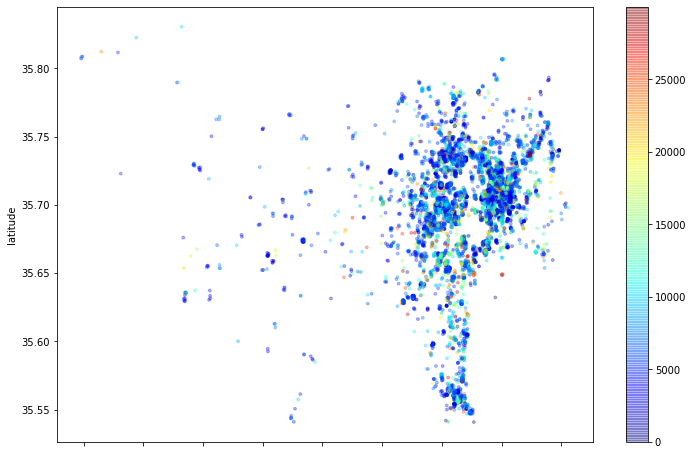

In [35]:
# plotar os imóveis pela latitude e longitude

df_colormap = df_clean[df_clean.price < limiar_3]
df_colormap.plot.scatter(x = 'longitude', y = 'latitude', alpha = 0.3, s=8,
                      c = df_colormap.price, colormap ='jet',figsize=(12,8));


Em contraste com a primeira versão desse *plot*, podemos notar nessa segunda versão uma maior  diversificação na coloração dos pontos, possibilitando uma melhor visualização sobre a distribuição dos preços dos imóveis em relação à sua localização geográfica. 

### **Q8. Qual é a média e relevância percentual dos valores para o mínimo de noites para aluguel (minimum_nights)?**

Vamos extrair a relevância percentual dos valores para coluna `minimum_nights`. 

In [25]:
(df_clean.minimum_nights.value_counts().sort_values(ascending=False))/df_clean.shape[0]

1     0.615820
2     0.264259
3     0.052701
30    0.015933
7     0.013293
5     0.013199
4     0.008862
14    0.005468
6     0.002451
10    0.001980
28    0.001131
20    0.001037
15    0.000943
21    0.000660
31    0.000471
13    0.000377
12    0.000283
11    0.000283
29    0.000283
8     0.000189
25    0.000094
18    0.000094
27    0.000094
9     0.000094
Name: minimum_nights, dtype: float64

Podemos também extrair do nosso *dataset* a média do número mínimo de noites para reserva, através da inspeção da média da coluna `minimum_nights`.

In [26]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

2.209578580182898

Vemos que a média de noites mínimas calculada é de aproximadamente 2.21, o que pode induzir à conclusão de que os anfritiôes buscam alugar o que corresponderia a um final de semana de aluguel. Porém, podemos notar pela relevância percentual acima que o **aluguel diário ainda é o mais relevante**, com 61.58%, invalidando a hipótese anterior.

## Conclusões


> Foi possível realizar uma análise superficial com base em um *dataset* resumido, fornecido pelo portal do Airbnb. Ainda assim, identificamos uma série de informações e *insights* interessantes sobre aluguéis de imóveis em Tokyo.

> Vale mencionar que identificamos a presença de *outliers*, os famosos "pontos fora da curva", que podem distorcer conclusões e informações estatísticas. Logo, foi empregada uma técnica de remoção desses dados para trazer maior confiabilidade à nossa análise.

> Futuramente, em uma próxima análise exploratória, buscarei utilizar o *dataset* completo, com 106 atributos, para obtenção de conclusões e *insights* com embasamento mais aprofundado.